# Exploratory Data Analysis - Axle Test Data
# Material Properties and Ductility/Brittleness Analysis

**Objective:** Comprehensive analysis of 385,000 material testing samples to understand:
- Chemical composition distributions
- Mechanical properties patterns
- Relationships between features and ductility/brittleness
- Impact of heat treatment on material behavior


In [ ]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib --break-system-packages

In [ ]:
pip install pandas numpy matplotlib --break-system-packages

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
!{sys.executable} -m pip install seaborn plotly --break-system-packages

  Using cached narwhals-2.12.0-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 8.2 MB/s  0:00:01m0:00:0100:01
Using cached narwhals-2.12.0-py3-none-any.whl (425 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [seaborn]m2/3 [seaborn]


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Initial Inspection


In [ ]:
# Load the dataset
df = pd.read_csv('/Users/chanduprasadbhairapu/Desktop/DSML_Final_Project/data/axle_test_385000_samples.csv')

print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First few rows:")
df.head(10)


Dataset Shape: (385000, 24)

First few rows:


,Row Number,Testing Group,Material,C [%],Si [%],Mn [%],P [%],S [%],Cr [%],Ni [%],Die-casting,Hardening and Quenching,Samples,Series Tempering,Additional Tempering,Diameter,Mean HV10,Min HV10,Max HV10,Avg Bending Force (N),Min Bending Force (N),Max Bending Force (N),Ductility %,Brittleness %
0,1,Testing Group H (Version-11) - Sample 1,4Cr13,0.391,0.166,0.463,0.015,0.007,12.988,0.304,No,1045+-5°C,5,200°C / 3h,No,8mm,644,623,665,4318,4019,4617,26.950,73.050
1,2,Testing Group D (Version-6) - Sample 2,4Cr13,0.399,0.635,0.377,0.026,0.018,13.120,0.080,No,1045+-5°C,5,No,200°C / 1h,8mm,634,623,645,4659,4439,4879,24.350,75.650
2,3,Testing Group I (Version-11) - Sample 3,4Cr13,0.411,0.495,0.192,0.017,0.020,12.564,0.468,No,1045+-5°C,5,200°C / 3h,220°C / 1h,8mm,634,618,650,4363,4109,4617,28.030,71.970
3,4,Testing Group E (Version-6) - Sample 4,4Cr13,0.388,0.170,0.279,0.017,0.011,12.690,0.427,No,1045+-5°C,5,No,220°C / 1h,8mm,607,597,617,4931,4624,5238,28.120,71.880
4,5,Testing Group H (Version-11) - Sample 5,4Cr13,0.408,0.510,0.452,0.030,0.017,12.913,0.276,No,1045+-5°C,5,200°C / 3h,No,8mm,646,618,674,4411,3917,4905,23.280,76.720
5,6,Testing (Version-14) - Sample 6,4Cr13,0.395,0.703,0.396,0.012,0.014,12.932,0.205,No,1045+-5°C,5,Vaccum hardening 230°C,No,8mm,597,580,614,6883,6589,7177,43.170,56.830
6,7,Testing Group C (Version-6) - Sample 7,4Cr13,0.444,0.654,0.393,0.028,0.022,13.000,0.347,No,1045+-5°C,3,No,180°C / 1h,Changed 7.8mm,644,626,662,3903,3360,4446,22.370,77.630
7,8,Testing Group H (Version-11) - Sample 8,4Cr13,0.382,0.753,0.186,0.009,0.008,13.108,0.145,No,1045+-5°C,5,200°C / 3h,No,8mm,640,614,666,4088,3886,4290,26.270,73.730
8,9,Testing Group I (Version-11) - Sample 9,4Cr13,0.414,0.386,0.354,0.024,0.022,13.578,0.450,No,1045+-5°C,5,200°C / 3h,220°C / 1h,8mm,614,603,625,4593,4287,4899,26.200,73.800
9,10,Testing Group E (Version-6) - Sample 10,4Cr13,0.410,0.348,0.485,0.027,0.013,12.714,0.229,No,1045+-5°C,5,No,220°C / 1h,8mm,615,602,628,4774,4291,5257,25.670,74.330


In [ ]:
# Dataset information
print("Dataset Information:")
print("="*80)
df.info()
print("\n" + "="*80)
print("Statistical Summary:")
df.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385000 entries, 0 to 384999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Row Number               385000 non-null  int64  
 1   Testing Group            385000 non-null  object 
 2   Material                 385000 non-null  object 
 3   C [%]                    385000 non-null  float64
 4   Si [%]                   385000 non-null  float64
 5   Mn [%]                   385000 non-null  float64
 6   P [%]                    385000 non-null  float64
 7   S [%]                    385000 non-null  float64
 8   Cr [%]                   385000 non-null  float64
 9   Ni [%]                   385000 non-null  float64
 10  Die-casting              385000 non-null  object 
 11  Hardening and Quenching  385000 non-null  object 
 12  Samples                  385000 non-null  int64  
 13  Series Tempering         385000 non-nu

,Row Number,C [%],Si [%],Mn [%],P [%],S [%],Cr [%],Ni [%],Samples,Mean HV10,Min HV10,Max HV10,Avg Bending Force (N),Min Bending Force (N),Max Bending Force (N),Ductility %,Brittleness %
count,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000,385000.000
mean,192500.500,0.407,0.471,0.419,0.020,0.029,13.047,0.222,4.641,638.301,618.804,657.799,4642.785,4243.301,5042.268,27.266,72.734
std,111140.071,0.017,0.196,0.165,0.007,0.053,0.285,0.146,0.768,28.364,28.927,28.961,995.950,1002.964,1002.307,6.287,6.287
min,1.000,0.370,0.124,0.164,0.008,0.006,12.400,0.000,3.000,580.000,551.000,590.000,2600.000,2040.000,2803.000,15.000,53.000
25%,96250.750,0.394,0.300,0.286,0.014,0.011,12.849,0.093,5.000,618.000,598.000,637.000,4096.000,3665.000,4465.000,23.050,69.240
50%,192500.500,0.406,0.476,0.408,0.020,0.016,13.049,0.221,5.000,635.000,616.000,655.000,4532.000,4137.000,4936.000,26.720,73.280
75%,288750.250,0.419,0.651,0.531,0.026,0.020,13.250,0.348,5.000,657.000,638.000,677.000,5115.000,4731.000,5529.000,30.760,76.950
max,385000.000,0.450,0.779,1.014,0.032,0.236,13.600,0.476,5.000,720.000,710.000,749.000,7523.000,7169.000,8025.000,47.000,85.000


## 2. Target Variable Analysis


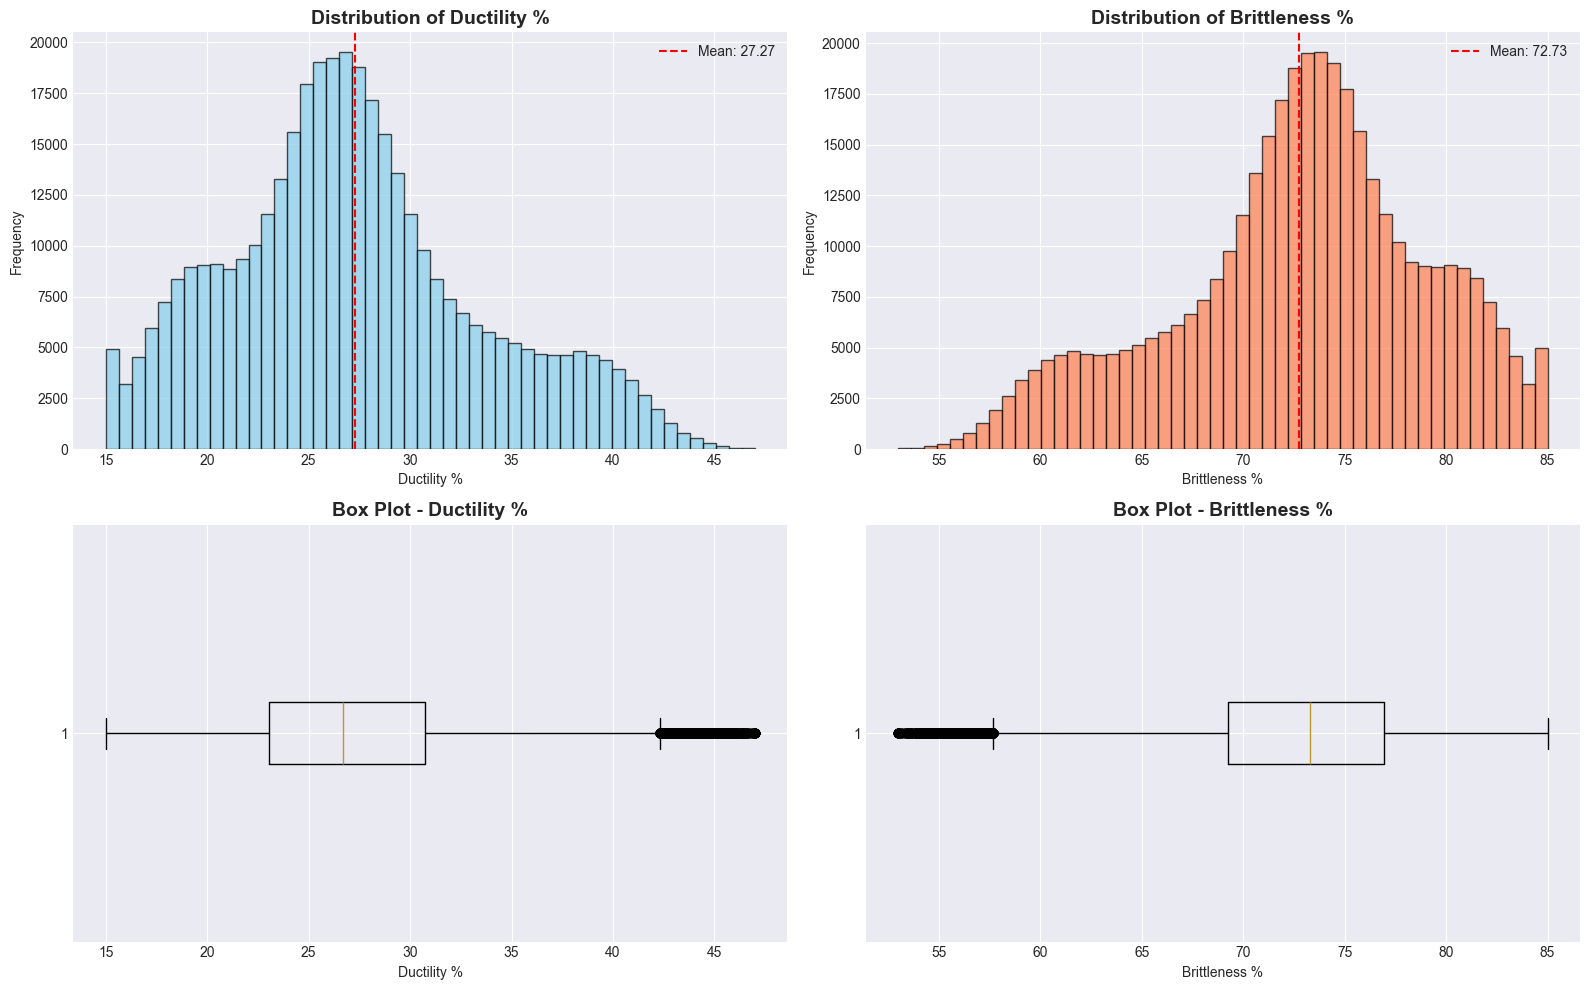

Ductility Mean: 27.27%
Brittleness Mean: 72.73%


In [ ]:
# Visualize target variable distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Ductility distribution
axes[0, 0].hist(df['Ductility %'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Ductility %', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Ductility %')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Ductility %'].mean(), color='red', linestyle='--', label=f'Mean: {df["Ductility %"].mean():.2f}')
axes[0, 0].legend()

# Brittleness distribution
axes[0, 1].hist(df['Brittleness %'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_title('Distribution of Brittleness %', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Brittleness %')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Brittleness %'].mean(), color='red', linestyle='--', label=f'Mean: {df["Brittleness %"].mean():.2f}')
axes[0, 1].legend()

# Box plots
axes[1, 0].boxplot(df['Ductility %'], vert=False)
axes[1, 0].set_title('Box Plot - Ductility %', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Ductility %')

axes[1, 1].boxplot(df['Brittleness %'], vert=False)
axes[1, 1].set_title('Box Plot - Brittleness %', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Brittleness %')

plt.tight_layout()
plt.show()

print(f"Ductility Mean: {df['Ductility %'].mean():.2f}%")
print(f"Brittleness Mean: {df['Brittleness %'].mean():.2f}%")


## 3. Chemical Composition Analysis


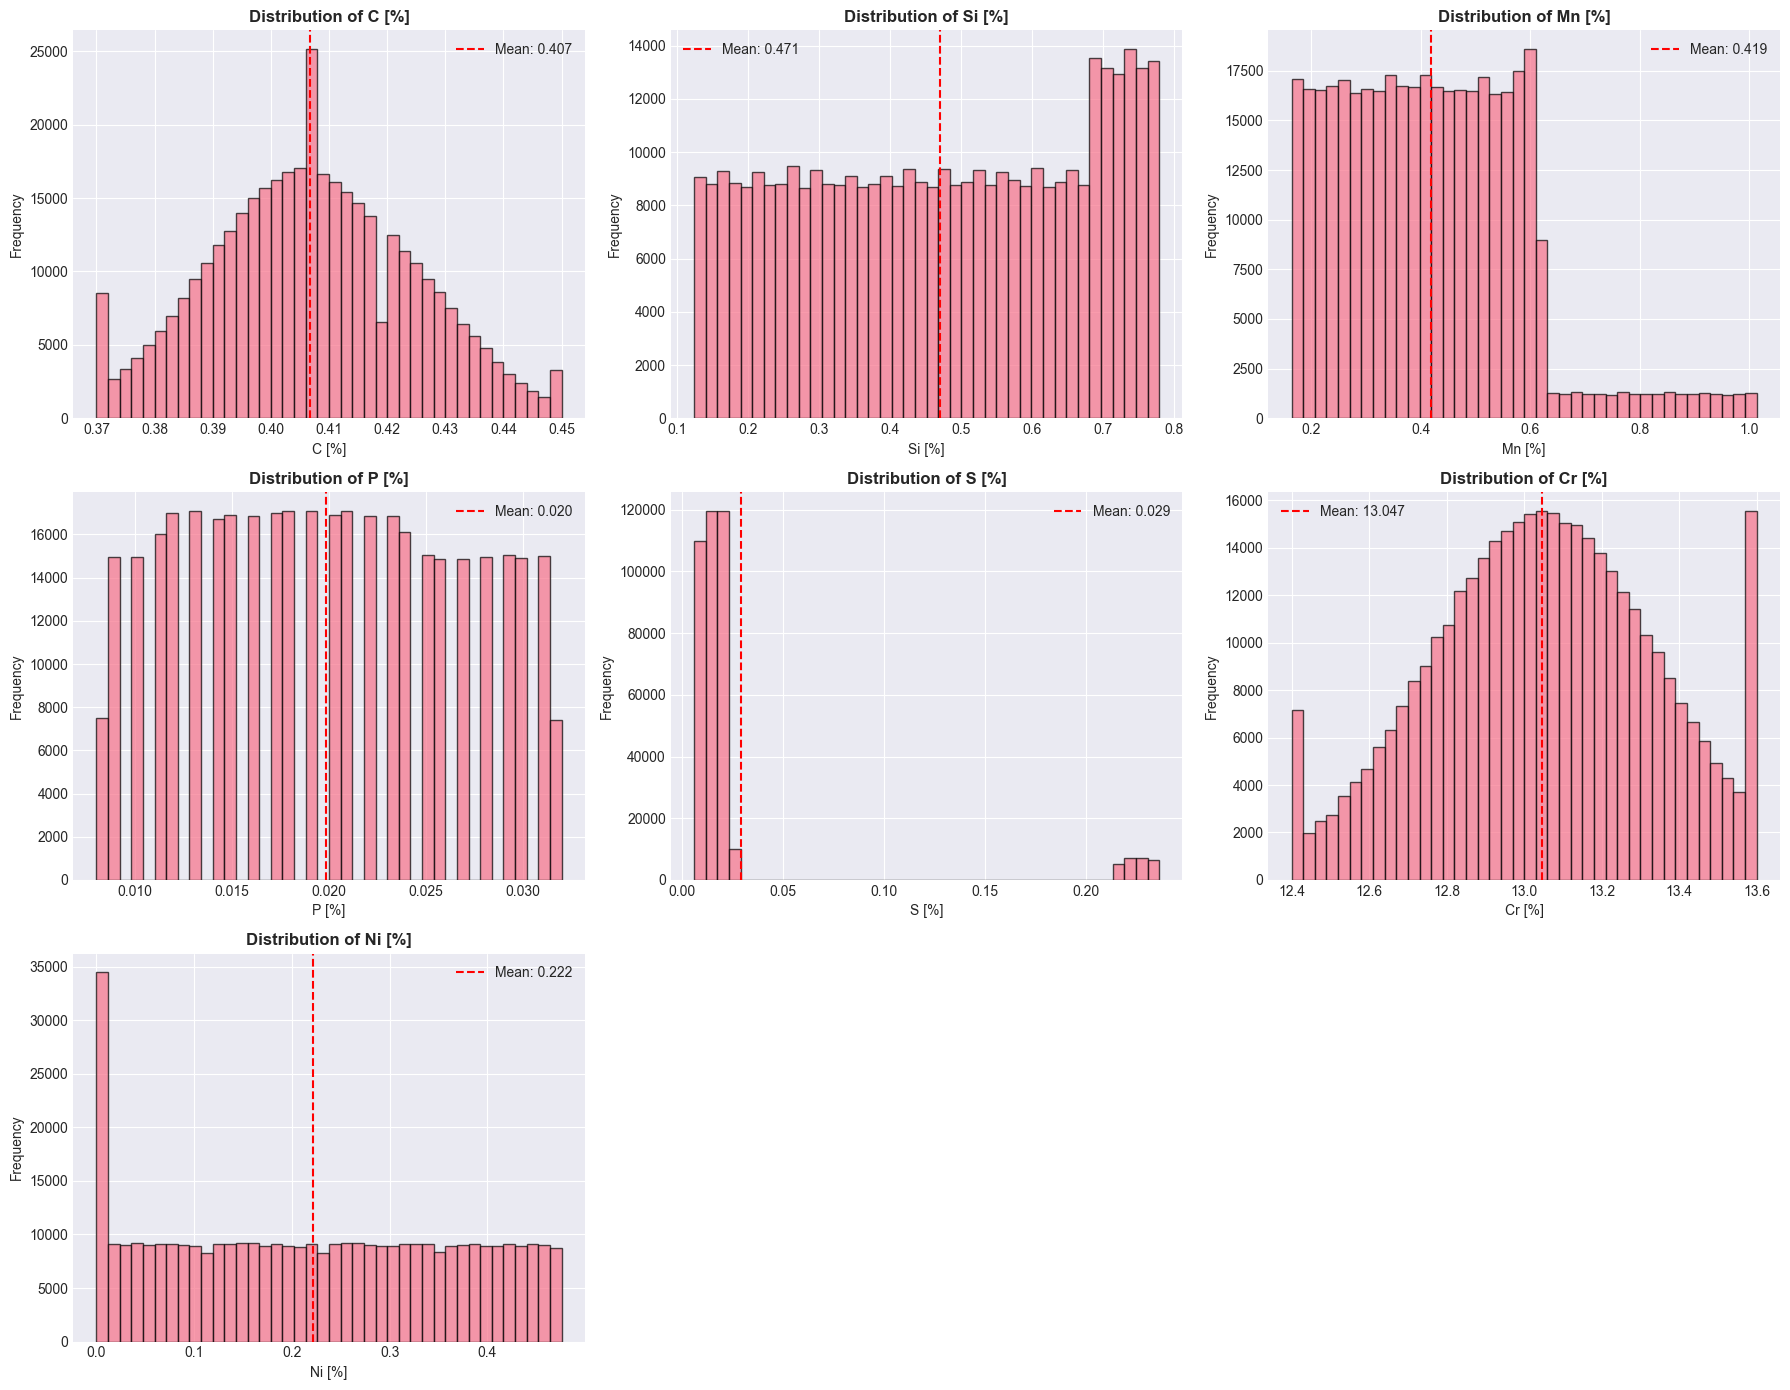

Chemical Composition Statistics:
           C [%]     Si [%]     Mn [%]      P [%]      S [%]     Cr [%]  \
count 385000.000 385000.000 385000.000 385000.000 385000.000 385000.000   
mean       0.407      0.471      0.419      0.020      0.029     13.047   
std        0.017      0.196      0.165      0.007      0.053      0.285   
min        0.370      0.124      0.164      0.008      0.006     12.400   
25%        0.394      0.300      0.286      0.014      0.011     12.849   
50%        0.406      0.476      0.408      0.020      0.016     13.049   
75%        0.419      0.651      0.531      0.026      0.020     13.250   
max        0.450      0.779      1.014      0.032      0.236     13.600   

          Ni [%]  
count 385000.000  
mean       0.222  
std        0.146  
min        0.000  
25%        0.093  
50%        0.221  
75%        0.348  
max        0.476  


In [ ]:
# Define chemical composition features
chemical_features = ['C [%]', 'Si [%]', 'Mn [%]', 'P [%]', 'S [%]', 'Cr [%]', 'Ni [%]']

# Visualize chemical composition distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, feature in enumerate(chemical_features):
    axes[idx].hist(df[feature], bins=40, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', 
                     label=f'Mean: {df[feature].mean():.3f}')
    axes[idx].legend()

# Hide extra subplots
for idx in range(len(chemical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("Chemical Composition Statistics:")
print(df[chemical_features].describe())


## 4. Correlation Analysis


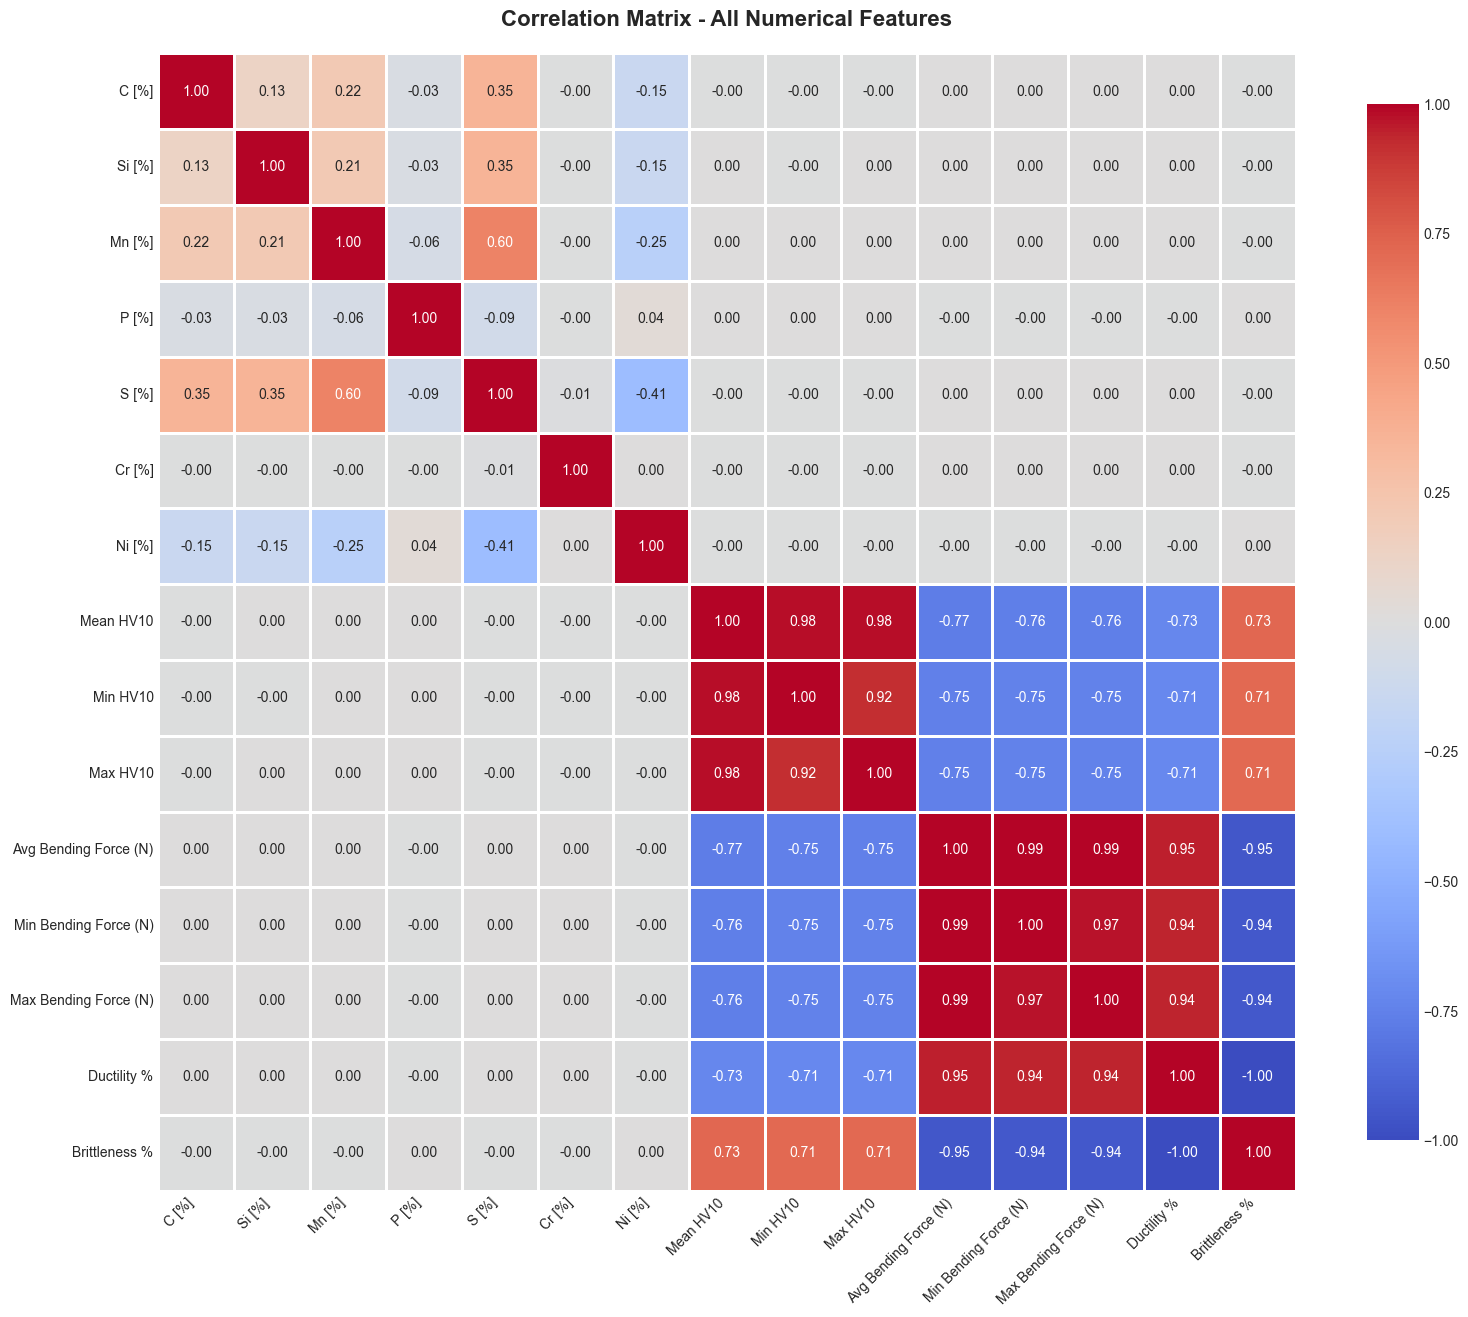


Top 10 Features Correlated with Ductility %:
Ductility %              1.000
Avg Bending Force (N)    0.949
Min Bending Force (N)    0.942
Max Bending Force (N)    0.942
C [%]                    0.003
S [%]                    0.003
Mn [%]                   0.001
Si [%]                   0.000
Cr [%]                   0.000
Ni [%]                  -0.002
Name: Ductility %, dtype: float64


In [ ]:
# Select numerical features for correlation
mechanical_features = ['Mean HV10', 'Min HV10', 'Max HV10', 
                       'Avg Bending Force (N)', 'Min Bending Force (N)', 'Max Bending Force (N)']
numerical_features = chemical_features + mechanical_features + ['Ductility %', 'Brittleness %']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation with target variable (Ductility)
target_correlation = correlation_matrix['Ductility %'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Ductility %:")
print(target_correlation.head(10))


## 5. Feature Relationships with Ductility


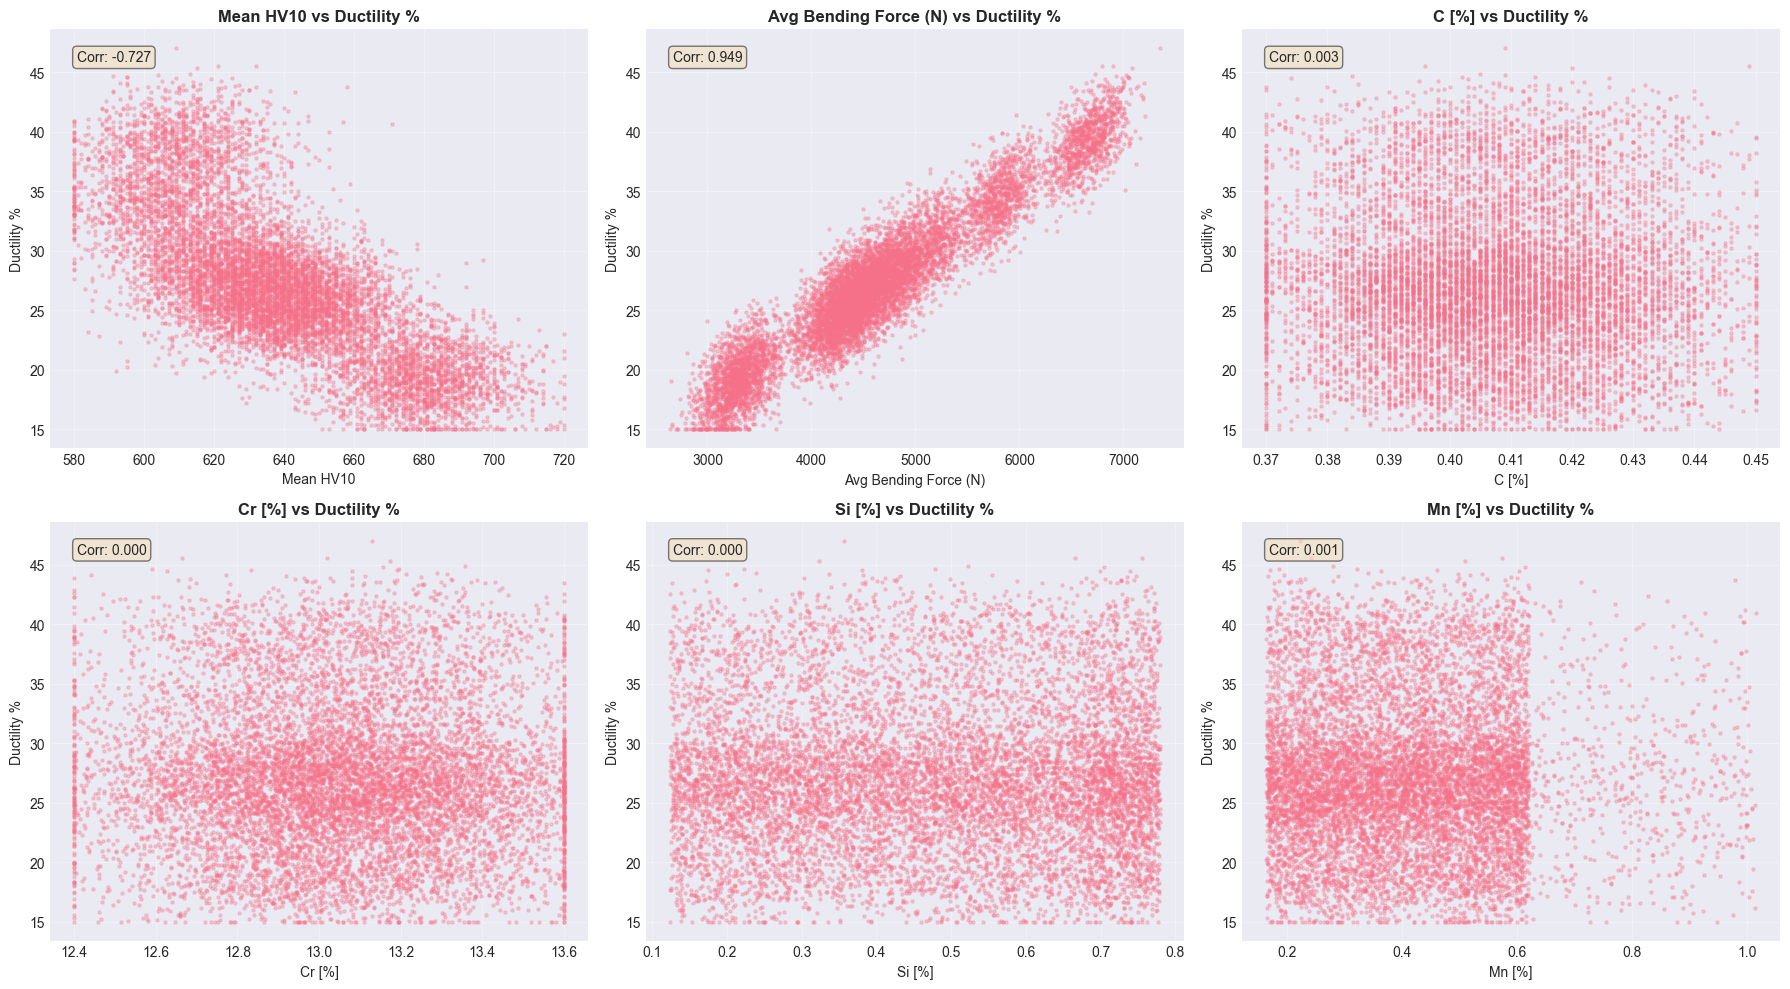

In [13]:
# Scatter plots of key features vs Ductility
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

key_features = ['Mean HV10', 'Avg Bending Force (N)', 'C [%]', 'Cr [%]', 'Si [%]', 'Mn [%]']

for idx, feature in enumerate(key_features):
    # Sample for better visualization
    sample_data = df.sample(n=min(10000, len(df)), random_state=42)
    axes[idx].scatter(sample_data[feature], sample_data['Ductility %'], alpha=0.3, s=5)
    axes[idx].set_title(f'{feature} vs Ductility %', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Ductility %')
    axes[idx].grid(True, alpha=0.3)
    
    # Add correlation
    corr = df[feature].corr(df['Ductility %'])
    axes[idx].text(0.05, 0.95, f'Corr: {corr:.3f}', transform=axes[idx].transAxes, 
                  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


## 6. Key Insights Summary


In [14]:
print("="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df):,}")
print(f"   - Number of features: {len(df.columns)}")
print(f"   - Material type: {df['Material'].unique()[0]}")

print("\n2. TARGET VARIABLES:")
print(f"   - Ductility % range: [{df['Ductility %'].min():.2f}, {df['Ductility %'].max():.2f}]")
print(f"   - Mean Ductility: {df['Ductility %'].mean():.2f}%")
print(f"   - Mean Brittleness: {df['Brittleness %'].mean():.2f}%")
print(f"   - Std Deviation (Ductility): {df['Ductility %'].std():.2f}%")

print("\n3. TOP CORRELATIONS WITH DUCTILITY:")
top_corr = target_correlation.drop('Ductility %').abs().sort_values(ascending=False).head(5)
for feature, _ in top_corr.items():
    actual_corr = target_correlation[feature]
    print(f"   - {feature}: {actual_corr:.3f}")

print("\n4. DATA QUALITY:")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Duplicate rows: {df.duplicated().sum()}")

print("\n" + "="*80)
print("EDA COMPLETE - Ready for Machine Learning Model Development")
print("="*80)

# Save processed data
df.to_csv('../data/processed_axle_data.csv', index=False)
print("\nProcessed data saved to: ../data/processed_axle_data.csv")


KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total samples: 385,000
   - Number of features: 24
   - Material type: 4Cr13

2. TARGET VARIABLES:
   - Ductility % range: [15.00, 47.00]
   - Mean Ductility: 27.27%
   - Mean Brittleness: 72.73%
   - Std Deviation (Ductility): 6.29%

3. TOP CORRELATIONS WITH DUCTILITY:
   - Brittleness %: -1.000
   - Avg Bending Force (N): 0.949
   - Min Bending Force (N): 0.942
   - Max Bending Force (N): 0.942
   - Mean HV10: -0.727

4. DATA QUALITY:
   - Missing values: 0
   - Duplicate rows: 0

EDA COMPLETE - Ready for Machine Learning Model Development

Processed data saved to: ../data/processed_axle_data.csv
